# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np # module for numerical work
from scipy import optimize # module for optimizing
from matplotlib import pyplot as plt # module for visualization
plt.style.use("seaborn") # formatting



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We start off by defining the utility function, the budget constraint and the equilibirum condition (stating that consumption must equal the budget). We then use the function optimize.minimize_scalar from scipy in order to maximize the consumer problem. Notice that the utility outcome of the equilibirum condition is negtive, which is necessary as we are using a minimizing function. Our maximizing function "solves" the problem by firstly determining the labour supply, which makes it possible to determine consumption and then finally determines the utility. Our output is as follows:
The optimal units of labor is 0.339, The optimal units of consumption is 1.101, The maximum utility is 0.075


In [2]:

# %%
# parameter values as given
m = 1   # cash-on-hand
v = 10 # scalar for disutility of labor
epsilon = 0.3 # Frisch elasticity
tau_0 = 0.4 # standard labor income tax
tau_1 = 0.1 # top bracket labor income tax
k = 0.4 # cut-off for top labor income tax

# utility function 
def utility(c,v,l,epsilon):
    """ Calculating utility
    
    Args:
    
        c (float): consumption
        v (integer): scalar for disutility of labour
        l (float): labour supply
        epsilon (integer):Frisch elasticity
        
    Returns:
    
        u_out (float): utility
    
    """
    u_out = np.log(c) - v* ((l**(1+1/epsilon))/(1+1/epsilon)) # as given
    return u_out

# budget constraint
def budget_constraint(m,w,l,tau_0,tau_1,k):
    """ Calculating budget constraint
    
    Args:
    
        m (integer): cash-on-hand
        w (float): wage rate
        l (float): labour supply
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        
    Returns:
    
        b_out (float): Budget constraint
    
    """
    b_out = m + (w*l) - (tau_0*w*l  +tau_1*np.fmax(w*l-k , 0)) # as given
    return b_out

# equilibrium
def equilibrium(l, w, epsilon, v, tau_0, tau_1, k):
    """ Defining the equilibrium condition and returning the negative utility that has to be minimized
    
    Args:
    
        l (float): labour supply
        w (float): wage rate
        epsilon (integer):Frisch elasticity
        v (integer): scalar for disutility of labor
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
    
        
    Returns:
    
        -utility (float): negative utility as function of consumption
    
    """
    c = budget_constraint(m,w,l,tau_0,tau_1,k)  # as utility is monotonically increasing in consumption
    return -utility(c,v,l,epsilon)

# call solver
def solve(w, epsilon, v, tau_0, tau_1, k, m): 
    """ Calculating optimal labour supply and consumption
    
    Args:

        w (float): wage rate
        epsilon (integer):Frisch elasticity
        v (integer): scalar for disutility of labor
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        m (integer): cash-on-hand
        
    Returns:
    
        l_star,c_star,u_star (float): Optimal labour supply, optimal consumption and Utility
    
    """
    solution = optimize.minimize_scalar(
    equilibrium,  method='bounded',
    bounds=(0, 1), args=(w,epsilon, v, tau_0,tau_1,k)) # maximization of equilibrium

    # solution
    l_star = solution.x
    c_star = budget_constraint(m, w, l_star,tau_0,tau_1,k)
    u_star = utility(c_star,v,l_star,epsilon)
    return l_star,c_star,u_star

l_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[0]

c_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[1]    

u_star = solve(0.5, epsilon, v , tau_0, tau_1, k, m)[2]        

print("The optimal units of labor is: " + str(l_star))
print("The optimal units of consumption is: " + str(c_star))
print("The maximum utility is: " + str(u_star))



The optimal units of labor is: 0.33924126400854654
The optimal units of consumption is: 1.101772379202564
The maximum utility is: 0.07560365728425235


# Question 2

We start off by generating a vector of 10000 values in the line space between 0.5 and 1.5. This is the wage span. We then create two empty arrays and loop the different values of wage through the maximixation function into these arrays. We then finally use the plt.figure function from matplotlib in order to illustrate the optimal labour supply and optimal consumption.
Our results are illustrated below.


<function show at 0x0000018874223B88>


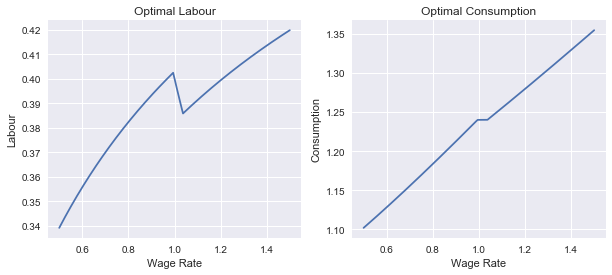

In [9]:


# set of vector values
N = 10000
wage_range = np.linspace(0.5, 1.5, N) # simulating 10.000 individuals uniformally distributed in range
labour_range = np.empty(N) # creating 2 empty arrays 
consumption_range = np.empty(N)

# looping values through solver and plugging into to empty arrays.
for i, w in enumerate(wage_range):
    sol = solve(w, epsilon, v, tau_0, tau_1, k, m) # looping individuals through our maximization from q1
    labour_range[i] = sol[0]
    consumption_range[i] = sol[1]

figure = plt.figure(figsize=(10,4)) # creating figure with 2 subplots for variables of interest

# left plot - labor
ax_left = figure.add_subplot(1,2,1)
ax_left.plot(wage_range, labour_range)
ax_left.set_title("Optimal Labour")
ax_left.set_xlabel("Wage Rate")
ax_left.set_ylabel("Labour")
ax_left.grid(True)


# right plot - consumption
ax_right = figure.add_subplot(1,2,2)
ax_right.plot(wage_range, consumption_range)
ax_right.set_title("Optimal Consumption")
ax_right.set_xlabel("Wage Rate")
ax_right.set_ylabel("Consumption")
ax_right.grid(True)

# print of results
print(plt.show)




# Question 3

As we previously defined a vector of 10000 values uniformally distributed between 0.5 and 1.5, and as the propability of the individual wage level is of no interest. We only have to define a function that sums each individual tax payment. We get the following result.
The total tax revenue is = 1630.19


In [4]:
def totaltax(tau_0, wage_range, labour_range, tau_1, k):
    """ Calculating the total taxrevenue
    
    Args:

        tau_0 (float): standard labor income tax
        wage_range (array): wage rate for each individual citizen
        labour_range (array): labour supply for each individual citizen
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        
    Returns:
    
        totaltax (float): Totaltax revenue
    
    """

    total_tax_revenue = np.sum(tau_0 * wage_range * labour_range + tau_1*np.fmax (wage_range*labour_range-k,0))
    return total_tax_revenue

# print of results    
print(f'The total taxrevenue is =  {totaltax(tau_0, wage_range, labour_range, tau_1, k):.2f}')


The total taxrevenue is =  1630.19


# Question 4

Our approach is the same as in question 2 and 3. We start by creating two empty arrays and update the value of epsilon. Then we loop the values through the optimizer into the empty arrays and then use our totaltax function in order to determine the new total tax revenue. Our result is as follows:
The total tax revenue is = 3196.88 for epsilon = 0.1


In [5]:
# creating empty parameter vectors
labour_range_updated = np.empty(N)
consumption_range_updated = np.empty(N)
epsilon_updated = 0.1 

# looping values of c,l through solver
for i, w in enumerate(wage_range):
    sol = solve(w, epsilon_updated, v, tau_0, tau_1, k, m)
    labour_range_updated[i] = sol[0]
    consumption_range_updated[i] = sol[1]

# print of results
print(f'The total tax revenue is =  {totaltax(tau_0, wage_range, labour_range_updated, tau_1, k):.2f} for epsilon = 0.1')



The total tax revenue is =  3196.88 for epsilon = 0.1


# Question 5

In order to maximize the total tax revenue, we start off by defining tax revenue as a function of tau_0, tau_1, kappa, wage, and labour. This function sums the individual tax payments in order to get the total revenue. Next we define the budget constraint as a function of the same vector and then the equilibrium condition as the function tax_optimal. We then use the optimize.minimize funtion in order to maximize the tax revenue. Our results is as follows:
Standard labour income tax: 99.2% Top bracket labour income tax: 74.0% Cut-off for the top labour income: 0.133 Total tax revenue: 21238.7 DKK


In [8]:
def tax_revenue(vec):
    
    """ Calculating the total tax revenue as a function of a vector
    
    Vec consists of:

        tau_0 (foat: standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        w (float): wage rate
        l (float): labour supply
        
    Returns:
    
        rev (float): Totaltax revenue
    
    """

    tau_0 = vec[0]
    tau_1 = vec[1]
    k = vec[2]
    w = vec[3]
    l = vec[4]
    rev = np.sum(tau_0 * w * l + tau_1*np.fmax(w*l-k,0))
    return  rev

def new_budget_constraint(vec):
      
    """ Calculating budget constraint as a function of a vector.
    
    The determined vector values is:

        tau_0 (foat: standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax

        
    Returns:
    
        new_bc (float): New budgetconstraint
    
    """

    tau_0 = vec[0]
    tau_1 = vec[1]
    k = vec[2]
    new_bc = m + vec[3] * vec[4] - (vec[0]*vec[3]*vec[4]+vec[1]*(np.fmax(vec[3]*vec[4]-vec[2] , 0 )))
    return new_bc
    
def tax_optimal(vec):
      
    """ Calculating negative tax revenue as a function of a vector which is possible to minimize. 
    
    The determined vector values are:

        w (float): wage rate
        l (float): labour supply
        
    Returns:
    
        tax_revenue(vec): Negative total tax revenue 
    
    """

    w = vec[3]
    l = vec[4]
    con = new_budget_constraint(vec)
    return -tax_revenue(vec)

#  total tax optimizer
initial_guess = [0.4 , 0.1 , 0.4 , 1 , 0.4]
bounds = ((0.00001,0.99999) , (0.00001,0.99999) , (0.00001,1.5) , (0.00001,1.5) , (0.00001,0.99999))
constraint = ({"type":"ineq","fun":new_budget_constraint})
 
result = optimize.minimize(tax_optimal , initial_guess , bounds=bounds , constraints=constraint , method="SLSQP")

# elements of result
tau_0_opt = result.x[0]
tau_1_opt = result.x[1]
k_opt = result.x[2]
w_opt = result.x[3]
l_opt = result.x[4]
tax_opt = np.sum(totaltax(w_opt , l_opt , tau_0_opt , tau_1_opt , k_opt))

# print of results

print(f'Standard labour income tax: {tau_0_opt*100:.1f}%')
print(f'Top bracket labour income tax: {tau_1_opt*100:.1f}%')
print(f'Cut-off for the top labour income: {k_opt:.3f}')
print(f'Total tax revenue: {tax_opt*10000:.1f} DKK')




Standard labour income tax: 99.2%
Top bracket labour income tax: 74.0%
Cut-off for the top labour income: 0.133
Total tax revenue: 21238.7 DKK


# Conclusion

We started this exercise be finding the optimal level of consumption, wage and labour supply with respect to the given set of parameters, ulitity functon and budget constraint. Speciffically, this was done by creating a solver mecanism, that maximized consumer utility subject to the budget constraint. These result are plotted in question 2, using the imported matplotlib-package. Given this optimal level of consumer choices, we found the total tax revenue by defining a function, that were also used, then the parameter value of epsilon were changed in question 4. Lastly, we created a new solver that optimized the total revenue with respect to the three parameters, that a social planner would be able to control, tau_0, tau_1 and kappa.